<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_model_selection/Ejercicio_how_many_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio:
Determinar cuántos grupos hay en los datos numéricos de la base de datos cars / iris / titanic



In [3]:
import seaborn as sns

dt = sns.load_dataset('titanic')
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
di = sns.load_dataset('iris')
di.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
dc = sns.load_dataset('mpg')
dc.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [0]:
from sklearn.datasets import make_blobs
import numpy as np

n_clusters = 6
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=2,random_state=random_state)

# Ajustar modelos GMM con diferente numero de componentes y encontrar el que mejor describe los datos:
NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='tied').fit(X)
    bic.append(gmm.bic(X))
    
print(bic)

idx_winner = np.argmin(bic) # elegir el modelo que tien mínimo BIC
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='tied').fit(X)

fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm)
plt.title("GMM clustering")
plt.show()

Solución (datos titanic):

In [20]:
import seaborn as sns

dt = sns.load_dataset('titanic')
dt_nonans = dt.dropna() # remove observations with NaNs
dt_num_nonans = dt_nonans.select_dtypes(include='number') # keep only numeric variables 

print('datos originales = {}'.format(dt.shape))
print('datos numericos sin NaNs = {}'.format(dt_num_nonans.shape))

datos originales = (891, 15)
datos numericos sin NaNs = (182, 6)


In [21]:
dt_num_nonans.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

<Figure size 576x576 with 0 Axes>

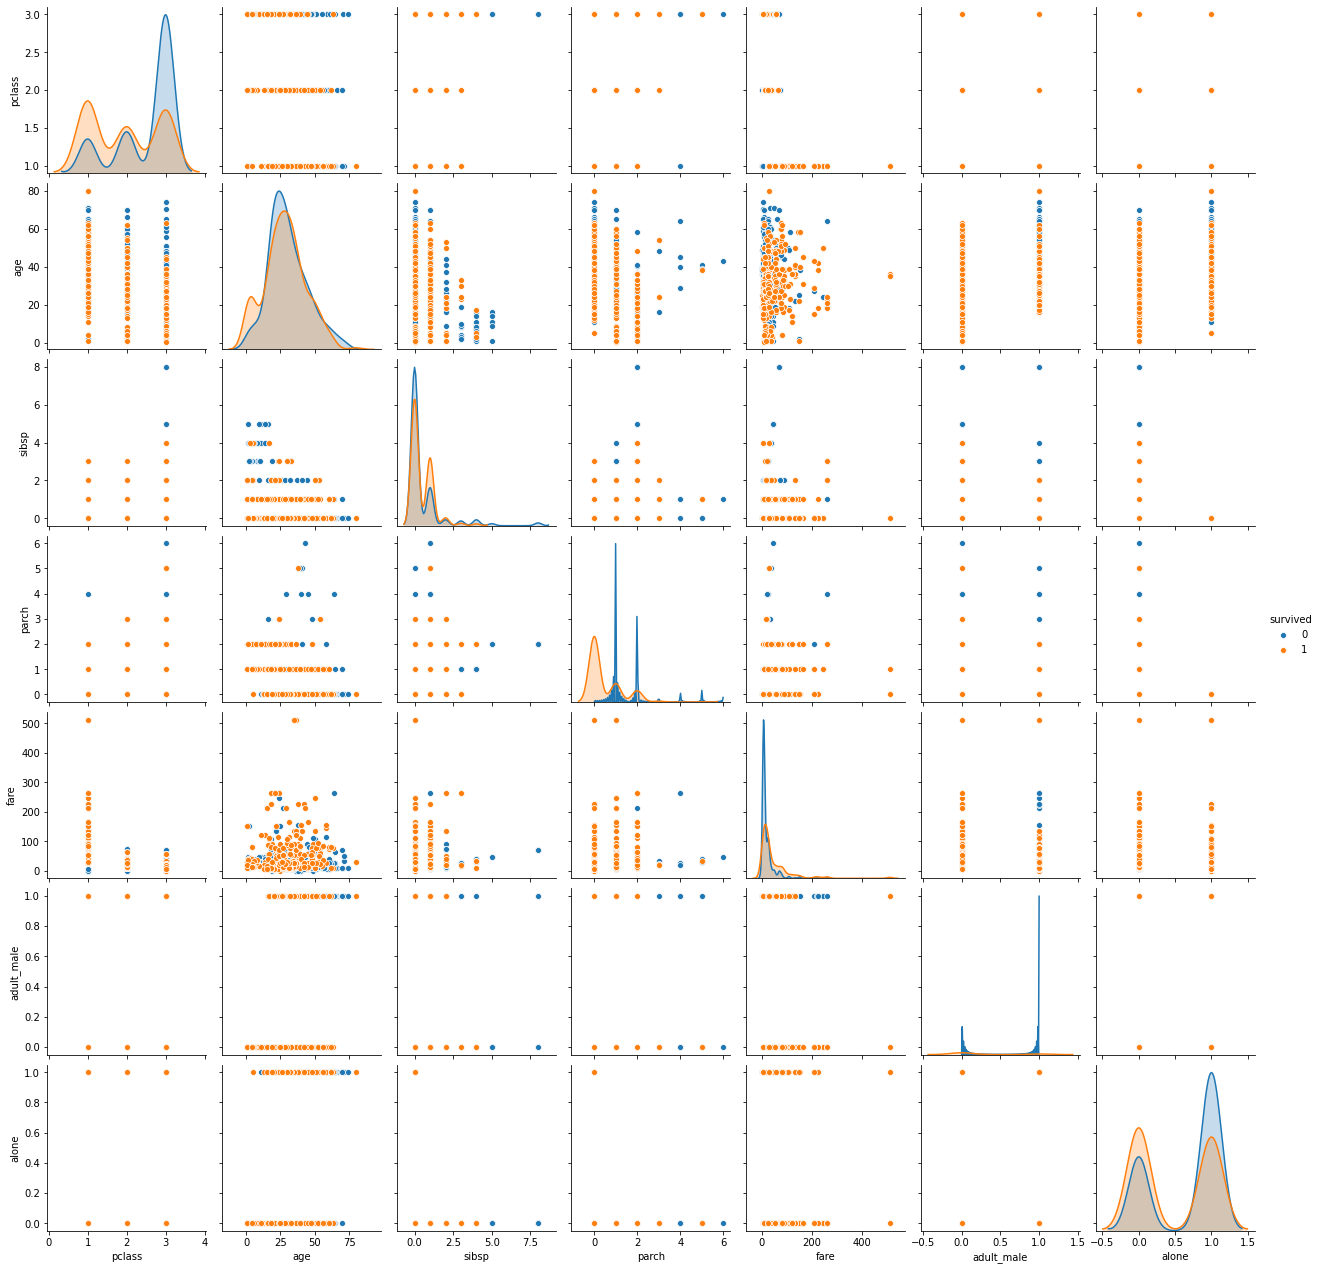

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
sns.pairplot(dt,hue='survived')
plt.show()

Intentar encontrar grupos en la única variable numérica disponible (edad):

In [39]:
from sklearn import mixture
import numpy as np

X = dt_num_nonans['age'].values
X = X.reshape(-1, 1)
#y = dt_nonans['sur'].values()

# Ajustar modelos GMM con diferente numero de componentes y encontrar el que mejor describe los datos:
NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='tied').fit(X)
    bic.append(gmm.bic(X))
    
print(bic)

idx_winner = np.argmin(bic) # elegir el modelo que tien mínimo BIC
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='tied').fit(X)

y_pred_gmm = gmm.fit_predict(X)


[1527.5726959854726, 1537.9008389423907, 1546.275169375142, 1557.2423915193826, 1555.3216879977904, 1555.6443417652392, 1561.7066060434722, 1571.95378830978, 1580.6871864965124, 1586.7843168846243]
...and the winner is GMM model G = 1


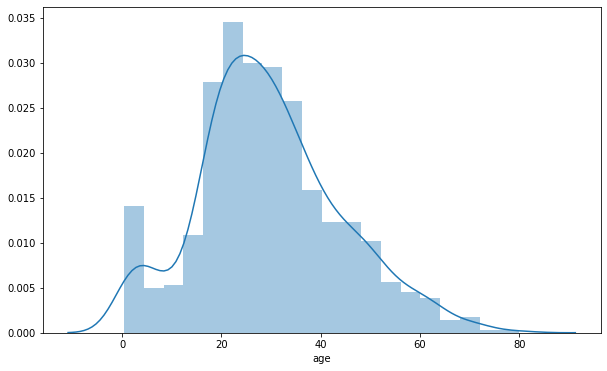

In [40]:
fig = plt.figure(figsize=(10,6))
ax=sns.distplot(dt["age"],bins=20)
plt.show()